# 1. Creating multiple unbalanced datasets
Author: Javier Sales-Ortiz

Date: Nov, 2022

CMPUT 644 Final Project

In [7]:
from partition import *
import numpy as np
import math

In [8]:
# For drawing the plot
def set_ax(ax1, ax2):
    ax1.legend(loc = 'upper right')
    ax1.set_xticks(x)
    ax1.set_title("Discrete Power-law Distr");
    ax1.set_xlabel("Class label")
    ax1.set_ylabel("Proportion")

    ax2.legend(loc = 'upper right')
    ax2.set_xticks(x)
    ax2.set_title("Bernoulli-Uniform Distr");
    ax2.set_xlabel("Class label")
    ax2.set_ylabel("Proportion");
client=0

## Proportions for a single client

s=6.737099894735935
y_zp = [0.99, 0.00928, 0.0006, 9e-05, 2e-05, 1e-05, 0.0, 0.0, 0.0, 0.0] 	 sum = 1.00 	 cv = 2.96679 	 mmr = inf
y_bu = [0.99893, 0.00012, 0.00012, 0.00012, 0.00012, 0.00012, 0.00012, 0.00012, 0.00012, 0.00012] 	 sum = 1.00 	 cv = 2.99640 	 mmr = 8324.417
s=3.6412463173389575
y_zp = [0.9, 0.07213, 0.01648, 0.00578, 0.00257, 0.00132, 0.00075, 0.00046, 0.0003, 0.00021] 	 sum = 1.00 	 cv = 2.67491 	 mmr = 4285.714
y_bu = [0.9764, 0.00262, 0.00262, 0.00262, 0.00262, 0.00262, 0.00262, 0.00262, 0.00262, 0.00262] 	 sum = 1.00 	 cv = 2.92140 	 mmr = 372.672
s=2.465942359594382
y_zp = [0.75, 0.13575, 0.04995, 0.02457, 0.01417, 0.00904, 0.00618, 0.00445, 0.00333, 0.00257] 	 sum = 1.00 	 cv = 2.20085 	 mmr = 291.829
y_bu = [0.92356, 0.00849, 0.00849, 0.00849, 0.00849, 0.00849, 0.00849, 0.00849, 0.00849, 0.00849] 	 sum = 1.00 	 cv = 2.74529 	 mmr = 108.782
s=1.4962698973849695
y_zp = [0.5, 0.17723, 0.09662, 0.06282, 0.04499, 0.03425, 0.02719, 0.02227, 0.01867, 0.01595] 	 sum = 1

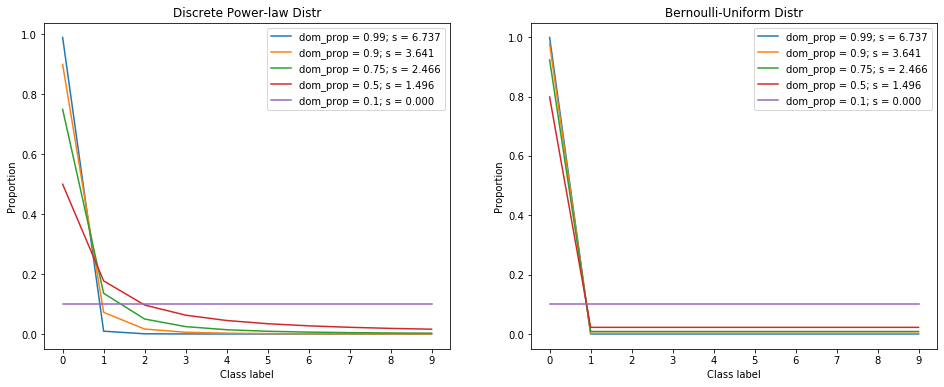

In [12]:
import matplotlib.pyplot as plt
N = 10 # Number of classes and number of clients

fig1 = plt.figure(figsize=(16,6))
ax1 = fig1.add_subplot(1,2,1)
ax2 = fig1.add_subplot(1,2,2)
x = list(range(N))

# Compare two distributions: zipf and bu with different parameters "s"
for p in [0.99, 0.9, 0.75, 0.5, 0.1]:
    s = unbal_param(N=N, p=p)
    y_zp = [round(zipf((i+client)%N+1, N, s), 5) for i in x]
    cv_zp = coef_var(y_zp)
    mmr_zp = maxmin_r(y_zp)
    y_bu = [round(bu((i+client)%N+1, N, s),   5) for i in x]
    cv_bu = coef_var(y_bu)
    mmr_bu = maxmin_r(y_bu)
    ax1.plot(x,y_zp, label=f'dom_prop = {p}; s = {s:.3f}')
    ax2.plot(x,y_bu, label=f'dom_prop = {p}; s = {s:.3f}')
    
    print(f"{s=}") 
    print(f"y_zp = {y_zp} \t sum = {sum(y_zp):.2f} \t cv = {cv_zp:.5f} \t mmr = {mmr_zp:.3f}")
    print(f"y_bu = {y_bu} \t sum = {sum(y_zp):.2f} \t cv = {cv_bu:.5f} \t mmr = {mmr_bu:.3f}")

set_ax(ax1,ax2)
#client+=1

In [5]:
# Get the parameter "s" given certain requisites
unbal_param(10, 0.1, param='coef_var', distr='zipf')

0.13790419284074415

In [6]:
# Get parameter "s" and show Newton steps
unbal_param(10, 1, param='dom_prop', distr='zipf', debug=True)

i: 0, s: 3.099, Obj: 0.847, err: 0.153, d: 0.314
i: 1, s: 4.376, Obj: 0.943, err: 0.057, d: 0.120
i: 2, s: 5.694, Obj: 0.979, err: 0.021, d: 0.043
i: 3, s: 7.058, Obj: 0.992, err: 0.008, d: 0.016
i: 4, s: 8.455, Obj: 0.997, err: 0.003, d: 0.006
i: 5, s: 9.871, Obj: 0.999, err: 0.001, d: 0.002
i: 6, s: 11.298, Obj: 1.000, err: 0.000, d: 0.001
i: 7, s: 12.732, Obj: 1.000, err: 0.000, d: 0.000
i: 8, s: 14.170, Obj: 1.000, err: 0.000, d: 0.000
i: 9, s: 15.610, Obj: 1.000, err: 0.000, d: 0.000
i: 10, s: 17.052, Obj: 1.000, err: 0.000, d: 0.000
i: 11, s: 18.493, Obj: 1.000, err: 0.000, d: 0.000
i: 12, s: 19.936, Obj: 1.000, err: 0.000, d: 0.000


19.935621581148606

## Proportions for multiple clients

[[1. 1. 1. 1. 1.]]
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


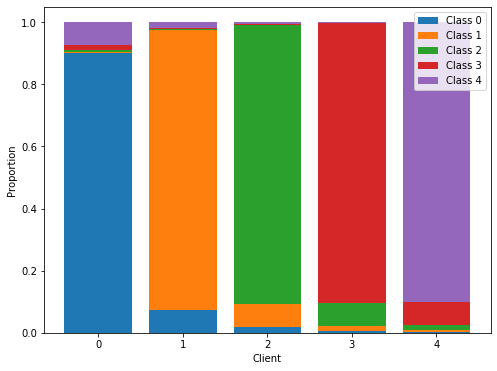

In [17]:
N = 5
s = unbal_param(N, p=0.9)
Y = np.zeros((N,N))
x = np.array(list(range(N)))
fig1 = plt.figure(figsize = (8,6))
ax1 = fig1.add_subplot(1,1,1)
row = np.zeros(x.shape)

for client in range(N): 
    yclient = np.array([zipf((i-client)%N+1, N, s) for i in x])
    Y[client] = yclient
    row += yclient
    ax1.bar(x,row, zorder = N - client, label=f'Class {client}')

ax1.set_xticks(x)
ax1.set_xlabel("Client")
ax1.set_ylabel("Proportion")
ax1.legend(loc="upper right")
print(Y.sum(axis = 0, keepdims = True))
print(Y.sum(axis = 1, keepdims = True))

## Artificial dataset

In [24]:
# Artificial dataset
np.set_printoptions(precision=3, suppress=True)

M = 100
X = np.zeros((M,1))
Y = np.zeros((M,1))
debug = False
N = 10
rng = np.random.default_rng(234)

for i in range(M):
    X[i] = rng.random(1)
    #Y[i] = rng.choice(list(range(N)))
    Y[i] = i % N
    

train_d = np.array(np.concatenate((X, Y), axis=1))

#train_d = rng.permutation(train_d)
#rng.shuffle(train_d)
X_e = train_d[:,[0]]
Y_e = train_d[:,[1]]
    
if debug:
    print("Train before shuffle: ")
    print(np.array(np.concatenate((X, Y), axis=1))[:5,:])
    print("Train after shuffle: \n", train_d[:5,:])

    print("X head")
    print(X[:5])
    print("train_d[:,[0]] head")
    print(X_e[:5])
    print((X == X_e).all())
    print((Y ==Y_e).all())
    
print("Train shape:", train_d.shape)

Train shape: (100, 2)


In [25]:
print(f"{X.shape=}")
print(f"{Y.shape=}")

X.shape=(100, 1)
Y.shape=(100, 1)


In [26]:
labels, lcounts = np.unique(Y_e, return_counts=True)
print(labels, lcounts)

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.] [10 10 10 10 10 10 10 10 10 10]


In [27]:
# Testing algorithm to shift distribution for each client
NUM_CLIENTS = N

len(np.unique(Y_e))
assert NUM_CLIENTS == len(np.unique(Y_e))
N = NUM_CLIENTS
P2 = np.zeros((N,N))
p = get_distr(NUM_CLIENTS, 2)

P = np.array([np.roll(p, i) for i in range(N)])

for i in range(N):
    for j in range(N):
        P2[i,j] = p[(j-i)%N]
print((P == P2).all())

True


In [28]:
p = get_distr(N, 2)

# Shift distribution
P = np.array([np.roll(p, i) for i in range(N)])
Pint = get_Pint(P, M, N)
# Cummulatively get the indices
Q = Pint.cumsum(axis = 0) .astype(int)
print(P)
print("----")
print(Q)
print(Q.sum(axis = 0, keepdims = True))
print(Q.sum(axis = 1, keepdims = True))

[[0.645 0.161 0.072 0.04  0.026 0.018 0.013 0.01  0.008 0.006]
 [0.006 0.645 0.161 0.072 0.04  0.026 0.018 0.013 0.01  0.008]
 [0.008 0.006 0.645 0.161 0.072 0.04  0.026 0.018 0.013 0.01 ]
 [0.01  0.008 0.006 0.645 0.161 0.072 0.04  0.026 0.018 0.013]
 [0.013 0.01  0.008 0.006 0.645 0.161 0.072 0.04  0.026 0.018]
 [0.018 0.013 0.01  0.008 0.006 0.645 0.161 0.072 0.04  0.026]
 [0.026 0.018 0.013 0.01  0.008 0.006 0.645 0.161 0.072 0.04 ]
 [0.04  0.026 0.018 0.013 0.01  0.008 0.006 0.645 0.161 0.072]
 [0.072 0.04  0.026 0.018 0.013 0.01  0.008 0.006 0.645 0.161]
 [0.161 0.072 0.04  0.026 0.018 0.013 0.01  0.008 0.006 0.645]]
----
[[ 7  2  1  0  0  0  0  0  0  0]
 [ 7  9  3  1  0  0  0  0  0  0]
 [ 7  9 10  3  1  0  0  0  0  0]
 [ 7  9 10 10  3  1  0  0  0  0]
 [ 7  9 10 10 10  3  1  0  0  0]
 [ 7  9 10 10 10 10  3  1  0  0]
 [ 7  9 10 10 10 10 10  3  1  0]
 [ 7  9 10 10 10 10 10 10  3  1]
 [ 8  9 10 10 10 10 10 10 10  3]
 [10 10 10 10 10 10 10 10 10 10]]
[[74 84 84 74 64 54 44 34 24 14]]

## Partition dataset for each client

In [30]:
#Dc = np_unbal_split(train_d, N, 0.7, param="dom_prop", distr="zipf", shuffle="True", np_generator=rng)

Dc = np_unbal_split(train_d, N, 0.7, param="dom_prop", distr="zipf", shuffle=False)
cts = 0
for i, ds in enumerate(Dc):
    print(f"\nClient {i}")
    print(ds.T)
    cts += ds.shape[0]
    lunique, lcounts = np.unique(ds[:,-1], return_counts = True)
    lcounts_n = lcounts / sum(lcounts)
    print(lunique)
    print(lcounts_n, ", ", sum(lcounts))
print(f"Total datapoints {cts}")


Client 0
[[0.8   0.998 0.937 0.675 0.809 0.179 0.566 0.451 0.87  0.282]
 [0.    0.    0.    0.    0.    0.    0.    1.    1.    2.   ]]
[0. 1. 2.]
[0.7 0.2 0.1] ,  10

Client 1
[[0.372 0.477 0.083 0.499 0.4   0.367 0.958 0.173 0.313 0.299]
 [1.    1.    1.    1.    1.    1.    1.    2.    2.    3.   ]]
[1. 2. 3.]
[0.7 0.2 0.1] ,  10

Client 2
[[0.622 0.673 0.267 0.218 0.667 0.201 0.025 0.618 0.19  0.502]
 [2.    2.    2.    2.    2.    2.    2.    3.    3.    4.   ]]
[2. 3. 4.]
[0.7 0.2 0.1] ,  10

Client 3
[[0.952 0.932 0.797 0.858 0.038 0.239 0.236 0.863 0.997 0.759]
 [3.    3.    3.    3.    3.    3.    3.    4.    4.    5.   ]]
[3. 4. 5.]
[0.7 0.2 0.1] ,  10

Client 4
[[0.688 0.887 0.201 0.814 0.51  0.894 0.361 0.533 0.575 0.856]
 [4.    4.    4.    4.    4.    4.    4.    5.    5.    6.   ]]
[4. 5. 6.]
[0.7 0.2 0.1] ,  10

Client 5
[[0.08  0.633 0.217 0.444 0.167 0.237 0.236 0.025 0.831 0.175]
 [5.    5.    5.    5.    5.    5.    5.    6.    6.    7.   ]]
[5. 6. 7.]
[0.7 0.2 0.1

In [13]:
Aflt = np.array([4.6, 4.9, 5.1, 5.4])
Aint = Aflt.round(0)
print(Aflt-Aint)

[-0.4 -0.1  0.1  0.4]


In [14]:
#print(X_e.shape)
#print(Xi.shape)

In [15]:
# Print artificial dataset
for i, row in enumerate(train_d):
    print(i, row)

0 [0.8 0. ]
1 [0.451 1.   ]
2 [0.282 2.   ]
3 [0.299 3.   ]
4 [0.502 4.   ]
5 [0.759 5.   ]
6 [0.856 6.   ]
7 [0.175 7.   ]
8 [0.453 8.   ]
9 [0.651 9.   ]
10 [0.998 0.   ]
11 [0.87 1.  ]
12 [0.173 2.   ]
13 [0.618 3.   ]
14 [0.863 4.   ]
15 [0.533 5.   ]
16 [0.025 6.   ]
17 [0.923 7.   ]
18 [0.534 8.   ]
19 [0.762 9.   ]
20 [0.937 0.   ]
21 [0.372 1.   ]
22 [0.313 2.   ]
23 [0.19 3.  ]
24 [0.997 4.   ]
25 [0.575 5.   ]
26 [0.831 6.   ]
27 [0.018 7.   ]
28 [0.179 8.   ]
29 [0.11 9.  ]
30 [0.675 0.   ]
31 [0.477 1.   ]
32 [0.622 2.   ]
33 [0.952 3.   ]
34 [0.688 4.   ]
35 [0.08 5.  ]
36 [0.985 6.   ]
37 [0.045 7.   ]
38 [0.872 8.   ]
39 [0.529 9.   ]
40 [0.809 0.   ]
41 [0.083 1.   ]
42 [0.673 2.   ]
43 [0.932 3.   ]
44 [0.887 4.   ]
45 [0.633 5.   ]
46 [0.255 6.   ]
47 [0.439 7.   ]
48 [0.181 8.   ]
49 [0.98 9.  ]
50 [0.179 0.   ]
51 [0.499 1.   ]
52 [0.267 2.   ]
53 [0.797 3.   ]
54 [0.201 4.   ]
55 [0.217 5.   ]
56 [0.012 6.   ]
57 [0.323 7.   ]
58 [0.091 8.   ]
59 [0.857 9.   ]
60 [

In [16]:
a = np.arange(0,5)
b = np.arange(5,10)
print(a)
print(b)
print(np.concatenate((a,b)))

[0 1 2 3 4]
[5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [17]:
b[np.array([0, 1, 2])]

array([5, 6, 7])